# First model

# Ovjective:
 - Create first model in order to further analyze the features


## Initial data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('datasets/train.csv')
pd.set_option('max_columns', 85)
df.head()

In [6]:
df.shape

(2051, 81)

Checking for null values and zeros

In [7]:
df.isnull().sum().sum()

9822

In [29]:
# this is zero_counter function
def zero_count(dataframe):
    count = 0
    for i in dataframe:
        if i == 0:
            count += 1
    return count

In [30]:
zeros_lst = []
for col in df.columns:
    zero_count(df[col])
    zeros_lst.append(zero_count(df[col]))
zeros_df = pd.DataFrame(zeros_lst, index=df.columns)
print(f'created zeros_lst and zeros_df')

created zeros_lst and zeros_df


In [31]:
zeros_df.sort_values(by=[0], ascending=False).head(30)

,0
pool_area,2042
3ssn_porch,2025
low_qual_fin_sf,2018
misc_val,1986
bsmt_half_bath,1923
screen_porch,1870
bsmtfin_sf_2,1803
enclosed_porch,1724
half_bath,1308
mas_vnr_area,1216


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

The part below covers the inital data analysis process. If you wish to jump to more thorough analysis section, you can click on this link [EDA](#EDA)

In [23]:
# list of categorical columns with nulls
col_nulls = [c for c in df.columns if df[c].isnull().sum() > 0]

In [45]:
for i in col_nulls:
    if i not in cat_cols:
        print(i)

lot_frontage
mas_vnr_area
bsmtfin_sf_1
bsmtfin_sf_2
bsmt_unf_sf
total_bsmt_sf
bsmt_full_bath
bsmt_half_bath
garage_yr_blt
garage_cars
garage_area


In [36]:
col_na = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'lot_frontage',\
          'garage_finish', 'garage_cond', 'garage_qual', 'garage_yr_blt', 'garage_type',\
          'bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmt_qual',\
          'mas_vnr_type', 'mas_vnr_area', 'bsmt_half_bath', 'bsmt_full_bath', 'garage_cars',\
          'garage_area', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'total_bsmt_sf', 'bsmtfin_sf_1',\
          'pool_area', '3ssn_porch', 'low_qual_fin_sf', 'misc_val', 'bsmt_half_bath',\
          'screen_porch', 'bsmtfin_sf_2','enclosed_porch', 'half_bath', 'mas_vnr_area',\
          'bsmt_full_bath', '2nd_flr_sf', 'wood_deck_sf', 'fireplaces', 'open_porch_sf',\
          'bsmtfin_sf_1', 'bsmt_unf_sf', 'garage_area', 'garage_cars', 'total_bsmt_sf',\
          'full_bath', 'bedroom_abvgr', 'kitchen_abvgr']

In [37]:
# numerical columns with either nulls or zeros
num_cols = [c for c in df[col_na]._get_numeric_data().columns]

In [38]:
# same as col_nulls
cat_cols = [c for c in col_na if c not in num_cols]

In [39]:
len(cat_cols)

15

In [ ]:
def check_unique(dataframe, col_lst):
    for i in dataframe[col_lst]:
        print(f'{[i]}: {dataframe[i].unique()}')

In [25]:
# checking what kind of data in the nulls and zeros columns
check_unique(df, cat_cols)

['pool_qc']: [nan 'Fa' 'Gd' 'Ex' 'TA']
['misc_feature']: [nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
['alley']: [nan 'Pave' 'Grvl']
['fence']: [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
['fireplace_qu']: [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['garage_finish']: ['RFn' 'Unf' 'Fin' nan]
['garage_cond']: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
['garage_qual']: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['garage_type']: ['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
['bsmt_exposure']: ['No' 'Gd' 'Av' nan 'Mn']
['bsmtfin_type_2']: ['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['bsmtfin_type_1']: ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
['bsmt_cond']: ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
['bsmt_qual']: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['mas_vnr_type']: ['BrkFace' 'None' nan 'Stone' 'BrkCmn']


In [30]:
with_dummies = pd.get_dummies(df, drop_first=True)
with_dummies.fillna(0, inplace=True)

In [33]:
most_correlated = ['exter_qual_TA', 'bsmt_qual_TA', 'mas_vnr_type_None', 'foundation_CBlock', 'lot_shape_Reg',\
'ms_zoning_RM', 'sale_type_WD ', 'kitchen_qual_Gd', 'wood_deck_sf', 'exterior_2nd_VinylSd', \
'garage_type_Attchd', 'bsmt_exposure_Gd', 'bsmtfin_sf_1', 'neighborhood_NridgHt', 'fireplaces',\
'mas_vnr_area', 'full_bath', 'year_built', 'total_bsmt_sf', 'garage_area', 'overall_qual']


## 1st Model

In [34]:
features = with_dummies.drop(columns=['id', 'pid', 'saleprice']).columns

X = with_dummies[features]
y = with_dummies['saleprice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data wi

In [37]:
lr = LinearRegression()
ridge = RidgeCV(cv=5)
lasso = LassoCV(cv=5)

In [38]:
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

-1.52813555331248e+21

In [39]:
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.774426411365099

In [40]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8085458711458285

In [41]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [42]:
lasso.score(X_train_sc, y_train)

0.9088725191125407

In [43]:
lasso.score(X_test_sc, y_test)

0.9023505522113023

In [44]:
coefs = lasso.coef_

In [45]:
feat_coefs = pd.DataFrame(coefs, index=(X_test.columns))

In [46]:
feat_coefs.sort_values(by=[0], ascending=False)

,0
gr_liv_area,18519.908145
overall_qual,14966.176377
neighborhood_NridgHt,8811.374359
neighborhood_StoneBr,6876.760104
year_built,6420.522517
neighborhood_NoRidge,5262.992484
bsmt_exposure_Gd,4783.137677
total_bsmt_sf,4507.176723
fireplaces,4296.843490
misc_feature_Gar2,3995.329728


In [47]:
pred = lasso.predict(X_test_sc)

In [48]:
residuals = y_test - pred

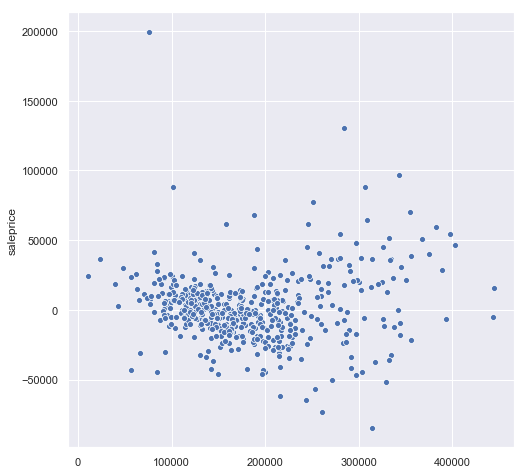

In [49]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(pred, residuals);

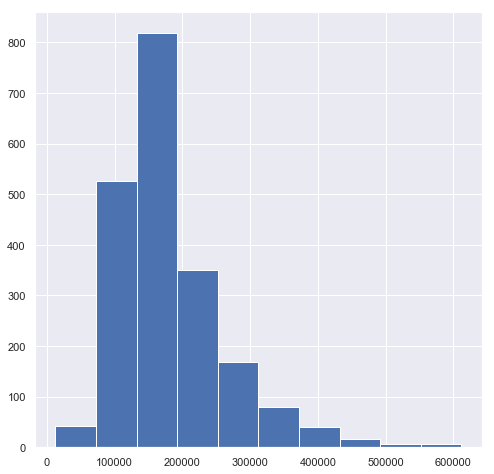

In [50]:
y.hist();